<a href="https://colab.research.google.com/github/tianchu-shu/DistinctiveSchools/blob/master/Predicting_SpringCGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt  


from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/Prediction/'
os.chdir(data_dir)

In [4]:
#Import my own code
import pipeline as pp
import final as final

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Bigquery

In [5]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#Getting the data for predicting spring CGP

%%bigquery --project ds-student-data df

SELECT *
FROM `ds-student-data.NweaAnalysis.RegressionforStoSGrowth`

In [7]:
df.shape

(77541, 11)

# Clean the data

In [8]:
df.shape

(77541, 11)

In [0]:
winter = df[df['TermName'].str.contains("Winter")]

In [0]:
spring = df[df['TermName'].str.contains("Spring")]

In [11]:
spring.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore
1521,Spring 2012-2013,43633376,Irving Park,6,Mathematics,81,NaN,NaN,54,NaN,240
1522,Spring 2012-2013,43853260,Irving Park,6,Mathematics,89,NaN,NaN,48,NaN,246
1523,Spring 2012-2013,50086544,West Belden,6,Mathematics,42,NaN,NaN,52,NaN,222
1524,Spring 2012-2013,43523635,Bucktown,6,Mathematics,61,NaN,NaN,58,NaN,230
1525,Spring 2012-2013,43781405,Bucktown,7,Mathematics,55,NaN,NaN,54,NaN,231


In [0]:
ks = ['StudentID', 'Grade', 'Discipline','SpringtoSpringConditionalGrowthPercentile']

In [0]:
spring = spring[ks]

In [0]:
winter =winter.dropna(axis=1, how='all')

In [15]:
winter.tail()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore
77326,Winter 2011-2012,50190246,Bucktown,1,Reading,14,-1.44,-0.08,54,157
77327,Winter 2011-2012,50146370,West Belden,1,Reading,11,-0.82,0.33,52,155
77328,Winter 2011-2012,50134448,Bucktown,K,Reading,99,2.97,NaN,59,182
77329,Winter 2011-2012,50068383,Bucktown,1,Reading,14,-1.12,-0.43,52,157
77330,Winter 2011-2012,50094081,Irving Park,2,Reading,5,0.71,NaN,52,160


In [0]:
rv = pd.merge(spring, winter, on=[ 'StudentID','Grade','Discipline'])

In [17]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore
0,43633376,6,Mathematics,NaN,Winter 2012-2013,Irving Park,77,-0.40,NaN,54,234
1,43853260,6,Mathematics,NaN,Winter 2012-2013,Irving Park,88,1.72,NaN,54,241
2,50086544,6,Mathematics,NaN,Winter 2012-2013,West Belden,21,-1.11,NaN,48,209
3,43523635,6,Mathematics,NaN,Winter 2012-2013,Bucktown,45,0.10,NaN,52,220
4,43781405,7,Mathematics,NaN,Winter 2012-2013,Bucktown,47,-1.06,NaN,50,225


In [18]:
df[(df.StudentID=='50369153') &(df.Discipline=="Reading")]

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore
20196,Winter 2017-2018,50369153,West Belden,1,Reading,35,0.10,0.97,63,NaN,164
22858,Winter 2018-2019,50369153,West Belden,2,Reading,25,-0.35,-0.84,49,NaN,172
22983,Spring 2017-2018,50369153,West Belden,1,Reading,37,NaN,NaN,48,19.0,174
30662,Spring 2018-2019,50369153,West Belden,2,Reading,13,NaN,NaN,58,4.0,172
67626,Winter 2019-2020,50369153,West Belden,3,Reading,1,-2.05,-4.85,35,NaN,155
72666,Winter 2016-2017,50369153,West Belden,K,Reading,13,-3.02,NaN,44,NaN,137
73743,Spring 2016-2017,50369153,West Belden,K,Reading,59,NaN,NaN,54,NaN,161


In [0]:
rv.dropna(inplace=True)

In [20]:
rv.shape

(28869, 11)

In [21]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore
31,43273221,8,Mathematics,22.0,Winter 2012-2013,West Belden,89,0.65,0.95,54,252
32,43050370,8,Mathematics,19.0,Winter 2012-2013,West Belden,87,1.86,2.41,48,250
33,44277530,6,Mathematics,17.0,Winter 2012-2013,Bucktown,88,-1.51,-0.30,52,241
34,43345087,8,Mathematics,20.0,Winter 2012-2013,West Belden,81,-0.62,-0.75,48,245
35,43371657,8,Mathematics,13.0,Winter 2012-2013,West Belden,84,1.14,0.62,52,247


#SpringtoSpringConditionalGrowthPercentile is the Y
#TestRITScore needs to put in bin

In [0]:
rv['RoundRIT']= rv['TestRITScore'].copy()

In [0]:
#Round the RIT Score to the nearest 10
rv['RoundRIT'] = rv['TestRITScore'].apply(lambda x: int(round(x/10.0)*10.0))

In [0]:
#round the testPercentile/PercentCorrect to nearest 5
rv['TestPercentile'] = rv['TestPercentile'].apply(lambda x: int(round(x/5.0)*5.0))

In [0]:
rv['PercentCorrect'] = rv['PercentCorrect'].apply(lambda x: int(round(x/5.0)*5.0))

In [26]:
rv.tail()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT
35853,50067284,1,Reading,50.0,Winter 2011-2012,Irving Park,75,0.45,1.15,60,181,180
35854,50078972,1,Reading,56.0,Winter 2011-2012,West Belden,65,0.24,0.71,50,176,180
35855,50134906,1,Reading,61.0,Winter 2011-2012,Bucktown,60,1.20,0.00,55,175,180
35856,50136564,1,Reading,71.0,Winter 2011-2012,Irving Park,95,0.59,-0.19,65,191,190
35857,50167001,1,Reading,63.0,Winter 2011-2012,Irving Park,95,-1.26,0.64,65,193,190


In [27]:
df.groupby('TermName').count()

,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore
TermName,,,,,,,,,,
Spring 2011-2012,4080,4080,4080,4080,4080,0,0,4080,3442,4080
Spring 2012-2013,4135,4135,4135,4135,4135,0,0,4135,3485,4135
Spring 2013-2014,4181,4181,4181,4181,4181,0,0,4181,3549,4181
Spring 2014-2015,4182,4182,4182,4182,4182,0,0,4182,3570,4182
Spring 2015-2016,4197,4197,4197,4197,4197,0,0,4197,3468,4197
Spring 2016-2017,4335,4335,4335,4335,4335,0,0,4335,3400,4335
Spring 2017-2018,4840,4840,4840,4840,4840,0,0,4840,3521,4840
Spring 2018-2019,6040,6040,6040,6040,6040,0,0,6040,4686,6040
Winter 2011-2012,4117,4117,4117,4117,4117,4039,3485,4117,0,4117


In [0]:
rv.to_csv('cleaned_data.csv', index=False)

In [60]:
rv['SpringtoSpringConditionalGrowthPercentile'].head()

31    22.0
32    19.0
33    17.0
34    20.0
35    13.0
Name: SpringtoSpringConditionalGrowthPercentile, dtype: float64

In [0]:
#bins the waittime by 20% of the data
BINS = [0, 20, 40, 60, 80, 100]
LABLES = [0,1,2,3,4]

#bin the waittime by 4 categories
#rv["StSCGP"]=pd.cut(rv['SpringtoSpringConditionalGrowthPercentile'], bins=BINS, labels=LABLES)

In [30]:
#rv.groupby('StSCGP')['StudentID'].count()

StSCGP
0    7005
1    5010
2    5191
3    5016
4    6647
Name: StudentID, dtype: int64

In [0]:
rv['Y'] = np.where(rv['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [63]:
rv['Y'].value_counts()

0    16854
1    12015
Name: Y, dtype: int64

In [90]:
# Finding Base Probability of Default
print ('Prob of Default')
print ( rv['Y'].sum()/rv.shape[0])

Prob of Default
0.4161903772212408


In [0]:
rv['FtWCGI']=pd.qcut(rv['FalltoWinterConditionalGrowthIndex'], q=5)

In [0]:
rv['WtWCGI']=pd.qcut(rv['WintertoWinterConditionalGrowthIndex'], q=5)

In [34]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,StSCGP,FtWCGI,WtWCGI
31,43273221,8,Mathematics,22.0,Winter 2012-2013,West Belden,90,0.65,0.95,55,252,250,1,"(0.23, 1.0]","(0.32, 1.04]"
32,43050370,8,Mathematics,19.0,Winter 2012-2013,West Belden,85,1.86,2.41,50,250,250,0,"(1.0, 11.41]","(1.04, 13.54]"
33,44277530,6,Mathematics,17.0,Winter 2012-2013,Bucktown,90,-1.51,-0.30,50,241,240,0,"(-8.901, -1.15]","(-1.03, -0.3]"
34,43345087,8,Mathematics,20.0,Winter 2012-2013,West Belden,80,-0.62,-0.75,50,245,240,0,"(-1.15, -0.42]","(-1.03, -0.3]"
35,43371657,8,Mathematics,13.0,Winter 2012-2013,West Belden,85,1.14,0.62,50,247,250,0,"(1.0, 11.41]","(0.32, 1.04]"


In [0]:
#Save a clean copy for later viz purpose
viz_df = rv.copy()

In [0]:
read =rv[rv.Discipline=='Reading']
math =rv[rv.Discipline=='Mathematics']
rd =rv[rv.Discipline=='Reading']
md =rv[rv.Discipline=='Mathematics']

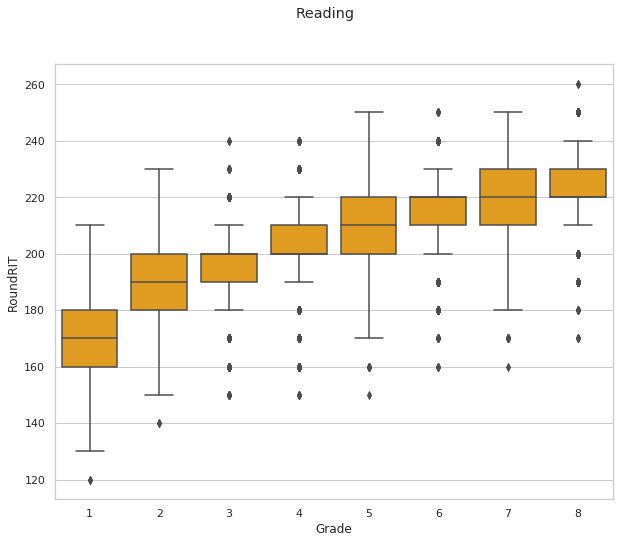

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('Reading')
sns.boxplot( x=read['Grade'], y=read["RoundRIT"], color="orange")
#sns.plt.show()


In [67]:
read.shape

(14437, 16)

In [68]:
math.shape

(14432, 16)

# Pre-processing

In [0]:
keep =['Y','Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI','PercentCorrect',
       'RoundRIT']

In [0]:
read= read[keep]
math=math[keep]

In [71]:
# CREATING DUMMIES
#df = pd.concat([df, dummy_df], axis=1)
keep.remove('Y')
print ('The following columns have been broken into dummies:' , keep)
for dummy in keep:
    read = pp.dummy_variable(dummy, read)
    math = pp.dummy_variable(dummy, math)
print (' ')

The following columns have been broken into dummies: ['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI', 'PercentCorrect', 'RoundRIT']
 


In [72]:
read.head()

,Y,Grade1,Grade2,Grade3,Grade4,Grade5,Grade6,Grade7,Grade8,SchoolNameBucktown,SchoolNameDCP Harper Woods,SchoolNameIrving Park,SchoolNamePrairie,SchoolNameWest Belden,TestPercentile0,TestPercentile5,TestPercentile10,TestPercentile15,TestPercentile20,TestPercentile25,TestPercentile30,TestPercentile35,TestPercentile40,TestPercentile45,TestPercentile50,TestPercentile55,TestPercentile60,TestPercentile65,TestPercentile70,TestPercentile75,TestPercentile80,TestPercentile85,TestPercentile90,TestPercentile95,TestPercentile100,"WtWCGI(-10.770999999999999, -1.03]","WtWCGI(-1.03, -0.3]","WtWCGI(-0.3, 0.32]","WtWCGI(0.32, 1.04]","WtWCGI(1.04, 13.54]","FtWCGI(-8.901, -1.15]","FtWCGI(-1.15, -0.42]","FtWCGI(-0.42, 0.23]","FtWCGI(0.23, 1.0]","FtWCGI(1.0, 11.41]",PercentCorrect20,PercentCorrect25,PercentCorrect30,PercentCorrect35,PercentCorrect40,PercentCorrect45,PercentCorrect50,PercentCorrect55,PercentCorrect60,PercentCorrect65,PercentCorrect70,PercentCorrect75,PercentCorrect80,PercentCorrect85,PercentCorrect90,RoundRIT120,RoundRIT130,RoundRIT140,RoundRIT150,RoundRIT160,RoundRIT170,RoundRIT180,RoundRIT190,RoundRIT200,RoundRIT210,RoundRIT220,RoundRIT230,RoundRIT240,RoundRIT250,RoundRIT260
1690,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1691,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1692,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1693,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1694,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


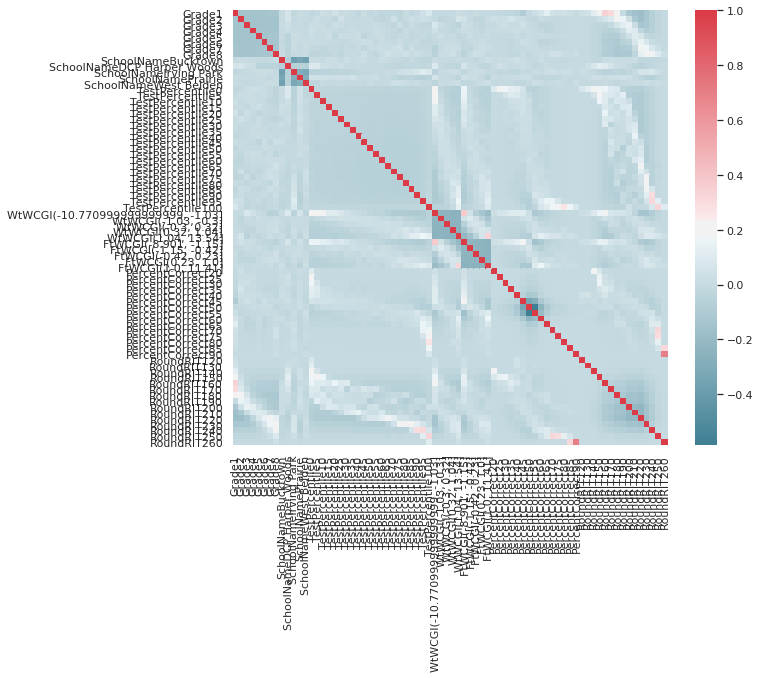

In [43]:
import numpy as np
pp.corr_matrix(read)

# Machine Learning

In [99]:
# Finding Base Probability of Default in math
print ('Prob of Default')
print ( math['Y'].sum()/math.shape[0])

Prob of Default
0.436529933481153


For math

In [0]:
indepv = list(math.columns)
indepv.remove('Y')

In [74]:
md.TermName.unique()

array(['Winter 2012-2013', 'Winter 2011-2012', 'Winter 2018-2019',
       'Winter 2017-2018', 'Winter 2013-2014', 'Winter 2014-2015',
       'Winter 2015-2016', 'Winter 2016-2017'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
x = math[indepv]
y = math['Y']  

In [0]:
x_train = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')]
y_train = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')]
x_test = x[md.TermName=='Winter 2018-2019']
y_test = y[md.TermName=='Winter 2018-2019']

In [79]:
x_test.shape

(2284, 74)

In [80]:
x_train.shape

(5144, 74)

In [0]:
results = final.clf_loop(["RF",'Bag','Boost', 'ET', 'KNN','SVM'], x_train, x_test, y_train, y_test)

In [89]:
best = final.best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
30,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.591944,0.600230,0.516086,0.048553
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.629597,0.660435,0.550960,6.514663
42,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.642732,0.670589,0.562836,0.317187
76,KNN,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig...",0.587128,0.641854,0.530179,3.929637
6,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.639229,0.668881,0.567275,0.039073
78,SVM,"{'C': 0.01, 'kernel': 'linear'}",0.616462,0.653157,0.530792,15.973677


In [438]:
results = final.clf_loop(['ET'], x_train, x_test, y_train, y_test)
best = final.best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
2,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.651051,0.668564,0.560251,0.319423


Feature ranking for Y
1. Grade7 (0.156028)
2. RoundRIT230 (0.108841)
3. WtWCGI(-10.770999999999999, -1.03] (0.068942)
4. WtWCGI(1.04, 13.54] (0.067544)
5. Grade3 (0.062311)
6. TestPercentile95 (0.046335)
7. RoundRIT240 (0.039389)
8. TestPercentile5 (0.033828)
9. FtWCGI(-8.901, -1.15] (0.030962)
10. RoundRIT260 (0.029800)
11. RoundRIT190 (0.027911)
12. Grade2 (0.024874)
13. RoundRIT200 (0.021174)
14. Grade1 (0.020452)
15. TestPercentile10 (0.019322)
16. WtWCGI(-1.03, -0.3] (0.018162)
17. SchoolNameWest Belden (0.015749)
18. WtWCGI(0.32, 1.04] (0.014996)
19. WtWCGI(-0.3, 0.32] (0.013724)
20. Grade8 (0.012367)


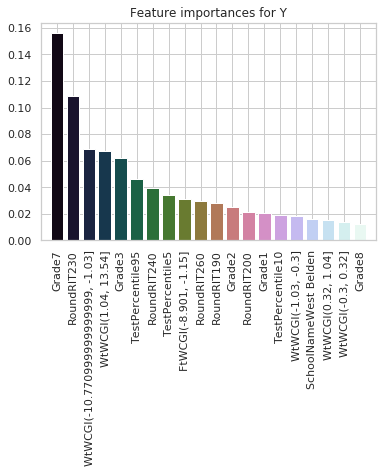

In [91]:
final.feature_importance(x_train, y_train, best, "ET", 20)

For reading


In [98]:
# Finding Base Probability of Default in Reading
print ('Prob of Default')
print ( read['Y'].sum()/read.shape[0])

Prob of Default
0.3958578652074531


In [0]:
indepv = list(read.columns)
indepv.remove('Y')

In [0]:
xr = read[indepv]
yr = read['Y']  

In [0]:
x_trainr = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
y_trainr = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
x_testr = xr[rd.TermName=='Winter 2018-2019']
y_testr = yr[rd.TermName=='Winter 2018-2019']

In [0]:
resultr = final.clf_loop(["RF",'Bag','Boost', 'ET', 'KNN','SVM'], x_trainr, x_testr, y_trainr, y_testr)

In [97]:
bestr = final.best_grid(resultr)

,model_type,parameters,accuracy,auc-roc,precision,time
31,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.626632,0.614182,0.449488,0.117871
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.664926,0.678873,0.566876,6.559833
61,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.667972,0.686431,0.575062,0.456237
76,KNN,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig...",0.642733,0.669569,0.551595,3.934413
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.670583,0.685743,0.570459,0.323587
78,SVM,"{'C': 0.01, 'kernel': 'linear'}",0.659704,0.663127,0.532401,15.103263


In [0]:
resultr = final.clf_loop([ 'ET'], x_trainr, x_testr, y_trainr, y_testr)

In [392]:
bestr = final.best_grid(resultr)

,model_type,parameters,accuracy,auc-roc,precision,time
22,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.678851,0.693725,0.572654,0.317445


Feature ranking for Y
1. WtWCGI(-10.770999999999999, -1.03] (0.102576)
2. Grade3 (0.082155)
3. Grade7 (0.071205)
4. RoundRIT230 (0.071123)
5. RoundRIT160 (0.054071)
6. WtWCGI(1.04, 13.54] (0.048393)
7. TestPercentile0 (0.047510)
8. RoundRIT240 (0.043629)
9. SchoolNamePrairie (0.040982)
10. TestPercentile85 (0.034108)
11. TestPercentile5 (0.033771)
12. FtWCGI(-8.901, -1.15] (0.022899)
13. RoundRIT220 (0.020482)
14. RoundRIT250 (0.018031)
15. TestPercentile90 (0.017795)
16. Grade4 (0.017338)
17. TestPercentile80 (0.016066)
18. TestPercentile95 (0.013597)
19. WtWCGI(0.32, 1.04] (0.011321)
20. TestPercentile20 (0.011212)


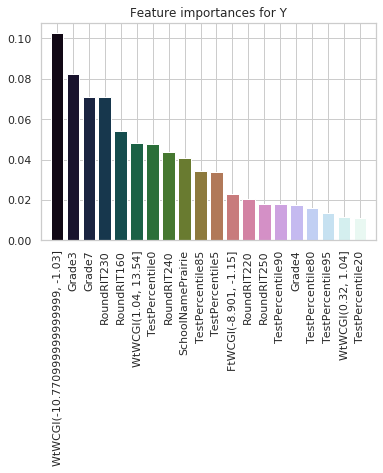

In [100]:
final.feature_importance(x_trainr, y_trainr, bestr, "ET", 20)

In [104]:
bestr

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME'], 'n_estimators': [1000]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [5],
  'max_features': ['log2'],
  'min_samples_split': [2],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'KNN': {'algorithm': ['auto'], 'n_neighbors': [50], 'weights': ['uniform']},
 'RF': {'max_depth': [5],
  'max_features': ['log2'],
  'min_samples_split': [2],
  'n_estimators': [100]},
 'SVM': {'C': [0.01], 'kernel': ['linear']}}

In [0]:
def Predicting(x_train,  y_train, test, grid):
    models = []
    for row in grid:
        models.append(row)
        
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
                clf.set_params(**p)
    rv = clf.fit(x_train, y_train).predict_proba(test)[:,1]
                  
    return rv

# Testing different threshold

In [0]:
from final import *

In [0]:
predy =Predicting(x_train, y_train, x_test, best)

In [469]:
predy.min()

0.1991283056118709

In [0]:
My =pd.DataFrame(predy, columns=['pred'])

In [0]:
#bin the waittime by 10 categories
My['bin']=pd.cut(My['pred'], bins=BINS, labels = LABELS)

In [0]:
true_y = md[md.TermName=='Winter 2018-2019']

In [452]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
2362,9.0,1
2363,21.0,1
2364,1.0,1
2365,3.0,1
2366,7.0,1


In [0]:
true_y =true_y[['SpringtoSpringConditionalGrowthPercentile', 'Y']]

In [0]:
#bins pred_y by 10% of the data
PBINS = [0,10,20,30,40,50,60,70,80,90,100]
LABELS = range(10)
#bin the waittime by 10 categories
true_y['Sbin']=pd.cut(true_y['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS, labels = LABELS)

In [0]:
true_y=true_y.reset_index(drop=True)

In [466]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y,Sbin
0,9.0,1,0
1,21.0,1,2
2,1.0,1,0
3,3.0,1,0
4,7.0,1,0


In [0]:
My = pd.concat([My, true_y], axis=1)

In [468]:
My.head()

,pred,bin,SpringtoSpringConditionalGrowthPercentile,Y,Sbin
0,0.573303,5,9.0,1,0
1,0.497057,4,21.0,1,2
2,0.543478,5,1.0,1,0
3,0.530652,5,3.0,1,0
4,0.516866,5,7.0,1,0


In [470]:
My['pred']= np.where(predy>= .4, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))

[[ 305 1062]
 [  80  837]]
Accuracy Score :
0.5
Report :
              precision    recall  f1-score   support

           0       0.79      0.22      0.35      1367
           1       0.44      0.91      0.59       917

    accuracy                           0.50      2284
   macro avg       0.62      0.57      0.47      2284
weighted avg       0.65      0.50      0.45      2284



In [474]:
My['pred']= np.where(predy>= .42, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))

[[470 897]
 [142 775]]
Accuracy Score :
0.5450963222416813
Report :
              precision    recall  f1-score   support

           0       0.77      0.34      0.47      1367
           1       0.46      0.85      0.60       917

    accuracy                           0.55      2284
   macro avg       0.62      0.59      0.54      2284
weighted avg       0.65      0.55      0.52      2284



In [472]:
My['pred']= np.where(predy>= .35, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))

[[ 114 1253]
 [  14  903]]
Accuracy Score :
0.44527145359019266
Report :
              precision    recall  f1-score   support

           0       0.89      0.08      0.15      1367
           1       0.42      0.98      0.59       917

    accuracy                           0.45      2284
   macro avg       0.65      0.53      0.37      2284
weighted avg       0.70      0.45      0.33      2284



Reading

In [0]:
pred_y =Predicting(x_trainr, y_trainr, x_testr, bestr)

In [425]:
pred_y

array([0.52257251, 0.46288064, 0.3932089 , ..., 0.49792087, 0.35623408,
       0.39965456])

In [0]:
py =pd.DataFrame(pred_y, columns=['pred'])

In [427]:
py.head()

,pred
0,0.522573
1,0.462881
2,0.393209
3,0.529018
4,0.476215


In [0]:
true_yr = rd[rd.TermName=='Winter 2018-2019']

In [0]:
#bins pred_y by 10% of the data

BINS = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
#bin the waittime by 10 categories
true_yr['Sbin']=pd.cut(true_yr['SpringtoSpringConditionalGrowthPercentile'], bins=BINS, labels = LABELS)

In [0]:
true_yr =true_yr[['SpringtoSpringConditionalGrowthPercentile', 'Y','Sbin']]

In [0]:
true_yr=true_yr.reset_index(drop=True)

In [460]:
true_yr.head()

,SpringtoSpringConditionalGrowthPercentile,Y,Sbin
0,15.0,1,1
1,2.0,1,0
2,15.0,1,1
3,1.0,1,0
4,4.0,1,0


In [0]:
py = pd.concat([py, true_yr], axis=1)

In [415]:
pred_y

array([0.52257251, 0.46288064, 0.3932089 , ..., 0.49792087, 0.35623408,
       0.39965456])

In [430]:
py.head()

,pred,bin,SpringtoSpringConditionalGrowthPercentile,Y,Sbin
0,0.522573,5,15.0,1,1
1,0.462881,4,2.0,1,0
2,0.393209,3,15.0,1,1
3,0.529018,5,1.0,1,0
4,0.476215,4,4.0,1,0


In [419]:
pred_y.min()

0.20287747524544733

In [0]:
#       Predict 0 1
# Actual
#   0
#   1

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [421]:
#Optimize for recall
tn, fp, fn, tp = confusion_matrix(py['Y'], py['pred']).ravel()
print('Recall :', tp/(fn+tp))
print('Precision :', tp/(fp+tp))

Recall : 0.5495915985997666
Precision : 0.521594684385382


In [431]:
py['pred']= np.where(pred_y>= .4, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[1009  432]
 [ 386  471]]
Accuracy Score :
0.6440382941688425
Report :
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1441
           1       0.52      0.55      0.54       857

    accuracy                           0.64      2298
   macro avg       0.62      0.62      0.62      2298
weighted avg       0.65      0.64      0.65      2298



In [432]:
py['pred']= np.where(pred_y>= .3, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[ 162 1279]
 [  32  825]]
Accuracy Score :
0.42950391644908614
Report :
              precision    recall  f1-score   support

           0       0.84      0.11      0.20      1441
           1       0.39      0.96      0.56       857

    accuracy                           0.43      2298
   macro avg       0.61      0.54      0.38      2298
weighted avg       0.67      0.43      0.33      2298



In [435]:
py['pred']= np.where(pred_y>= .28, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[  93 1348]
 [  21  836]]
Accuracy Score :
0.4042645778938207
Report :
              precision    recall  f1-score   support

           0       0.82      0.06      0.12      1441
           1       0.38      0.98      0.55       857

    accuracy                           0.40      2298
   macro avg       0.60      0.52      0.33      2298
weighted avg       0.65      0.40      0.28      2298



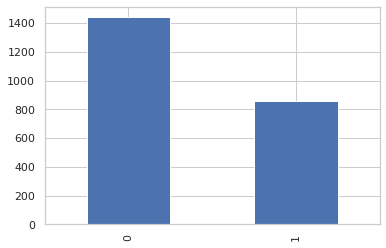

In [412]:
py['Y'].value_counts().plot.bar()

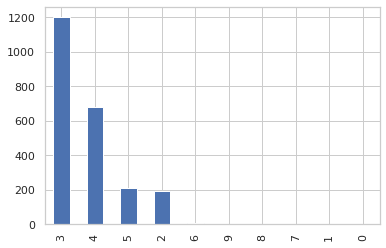

In [411]:
py['bin'].value_counts().plot.bar()

#Previous code

In [0]:
def logit(x_train, x_test, y_train, y_test):
    '''
    Run logit regression and print out the scores for comparison
    '''

    # get train/test data
     
    log = linear_model.LogisticRegression()
    log_model = log.fit(x_train, y_train)
    predictions = log_model.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('Logit Score test + train:', log_model.score(x_test, y_test), log_model.score(x_train, y_train))

In [0]:
def feature_importance(x_train, y_train, clf, k=10):
    '''
    Based on the best grid for each classifer, print out the 
    top k important features
    '''

    indepv = list(x_train.columns)
    importances = clf.feature_importances_
    current_palette = sns.color_palette(sns.color_palette("cubehelix", k))
    
    indices = np.argsort(importances)[::-1]
    indices = indices[:k]

    # Print the feature ranking
    print("Feature ranking for %s" % (y_train.name))

    labels_arr = []
    for f in range(len(indices)):
        label = indepv[indices[f]]
        labels_arr.append(label)
        print("%d. %s (%f)" % (f+1, label, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances for %s" % (y_train.name))
    plt.bar(range(len(indices)), importances[indices], align="center", tick_label = labels_arr, color= current_palette)
    plt.xlim([-1, len(indices)])
    plt.xticks(range(len(indices)),labels_arr, rotation = 'vertical')
    plt.show()
    return

In [0]:
def rf(x_train, x_test, y_train, y_test):
    '''
    Generate the random forest model using existing dataset
    Returns: (None)
       Save the random forest model using pickle
    
    '''
    rf_model = RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=10, n_estimators=10)
    rf_model.fit(x_train, y_train)
    predictions =  rf_model.predict(x_test)
    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()
    print(rf_model)
    print('RandomForest Score:',  rf_model.score(x_test, y_test),  rf_model.score(x_train, y_train))
    return rf_model


In [51]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors.kde import KernelDensity
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def ols(x_train, x_test, y_train, y_test):
    '''
    Run ols regression and print out the scores for comparison
    '''
    # fit a OLS model
    ols = linear_model.LinearRegression()
    ols_model = ols.fit(x_train, y_train)
    predictions = ols.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('OLS Score:', ols_model.score(x_test, y_test), ols_model.score(x_train, y_train))
    #return predictions, x_test, y_test